# **Laboratorio** 4

### Importaciones de las librerias

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import os

### 2. Utilice el conjunto de datos churn adjunto en el repositorio.

In [11]:
pf = pd.read_csv('churn.csv', delimiter=';')

### 3. Utilice las funciones básicas para visualizar las principales características del conjunto de datos.

##### 3.1 Visualizar las primeras filas del DataFrame

In [ ]:
print(pf.head())

##### 3.2. Información general del DataFrame

In [ ]:
print("\nInformación general del DataFrame:")
print(pf.info())

##### 3.3. Resumen estadístico del DataFrame

In [ ]:
print("\nResumen estadístico del DataFrame:")
print(pf.describe())

##### 3.4. Visualizar la distribución de la variable objetivo 'churn'

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=pf)
plt.title('Distribución de Churn')
plt.show()

##### 3.5. Correlación entre las variables numéricas

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(pf.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

##### 3.6. Boxplot para algunas variables numéricas

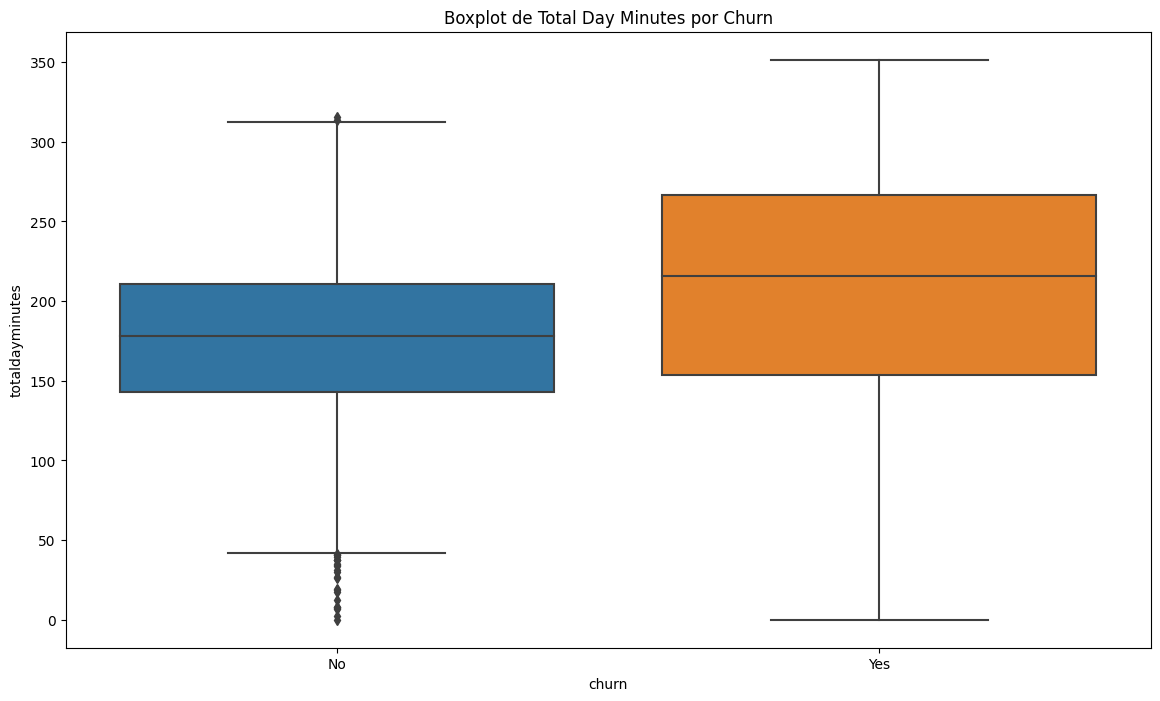

In [17]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='churn', y='totaldayminutes', data=pf)
plt.title('Boxplot de Total Day Minutes por Churn')
plt.show()


### 4. Cambie los nombres de las columnas del dataset a español

In [18]:
# Definimos los nombres de las columnas y le asignamos los nuevos
nuevos_nombres = {
    'churn': 'abandono',
    'accountlength': 'longitud_cuenta',
    'internationalplan': 'plan_internacional',
    'voicemailplan': 'plan_correo_de_voz',
    'numbervmailmessages': 'numero_mensajes_correo_de_voz',
    'totaldayminutes': 'total_minutos_dia',
    'totaldaycalls': 'total_llamadas_dia',
    'totaldaycharge': 'total_cargo_dia',
    'totaleveminutes': 'total_minutos_tarde',
    'totalevecalls': 'total_llamadas_tarde',
    'totalevecharge': 'total_cargo_tarde',
    'totalnightminutes': 'total_minutos_noche',
    'totalnightcalls': 'total_llamadas_noche',
    'totalnightcharge': 'total_cargo_noche',
    'totalintlminutes': 'total_minutos_internacionales',
    'totalintlcalls': 'total_llamadas_internacionales',
    'totalintlcharge': 'total_cargo_internacional',
    'numbercustomerservicecalls': 'numero_llamadas_servicio_cliente'
}

# Aplicar el cambio
pf.rename(columns=nuevos_nombres, inplace=True)

# Mostramos los nombres cambiado
print(pf.columns)


Index(['abandono', 'longitud_cuenta', 'plan_internacional',
       'plan_correo_de_voz', 'numero_mensajes_correo_de_voz',
       'total_minutos_dia', 'total_llamadas_dia', 'total_cargo_dia',
       'total_minutos_tarde', 'total_llamadas_tarde', 'total_cargo_tarde',
       'total_minutos_noche', 'total_llamadas_noche', 'total_cargo_noche',
       'total_minutos_internacionales', 'total_llamadas_internacionales',
       'total_cargo_internacional', 'numero_llamadas_servicio_cliente'],
      dtype='object')


### 5. Determine si existe valores nulos en el conjunto de datos, sustente sus hallazgos con evidencia grafica.


In [ ]:
# Verificamos la existencia de valores nulos
valores_nulos = pf.isnull().sum()

# Mostramos un gráfico con los valores nulos
plt.figure(figsize=(10, 6))
sns.heatmap(pf.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Nulos en el Conjunto de Datos')
plt.show()

# Imprimimos la cantidad de nulos que se encontraron
print("Cantidad de valores nulos por columna:")
print(valores_nulos)

### 6. Determine la existencia de valores atípicos, sustente sus hallazgos con evidencia grafica.

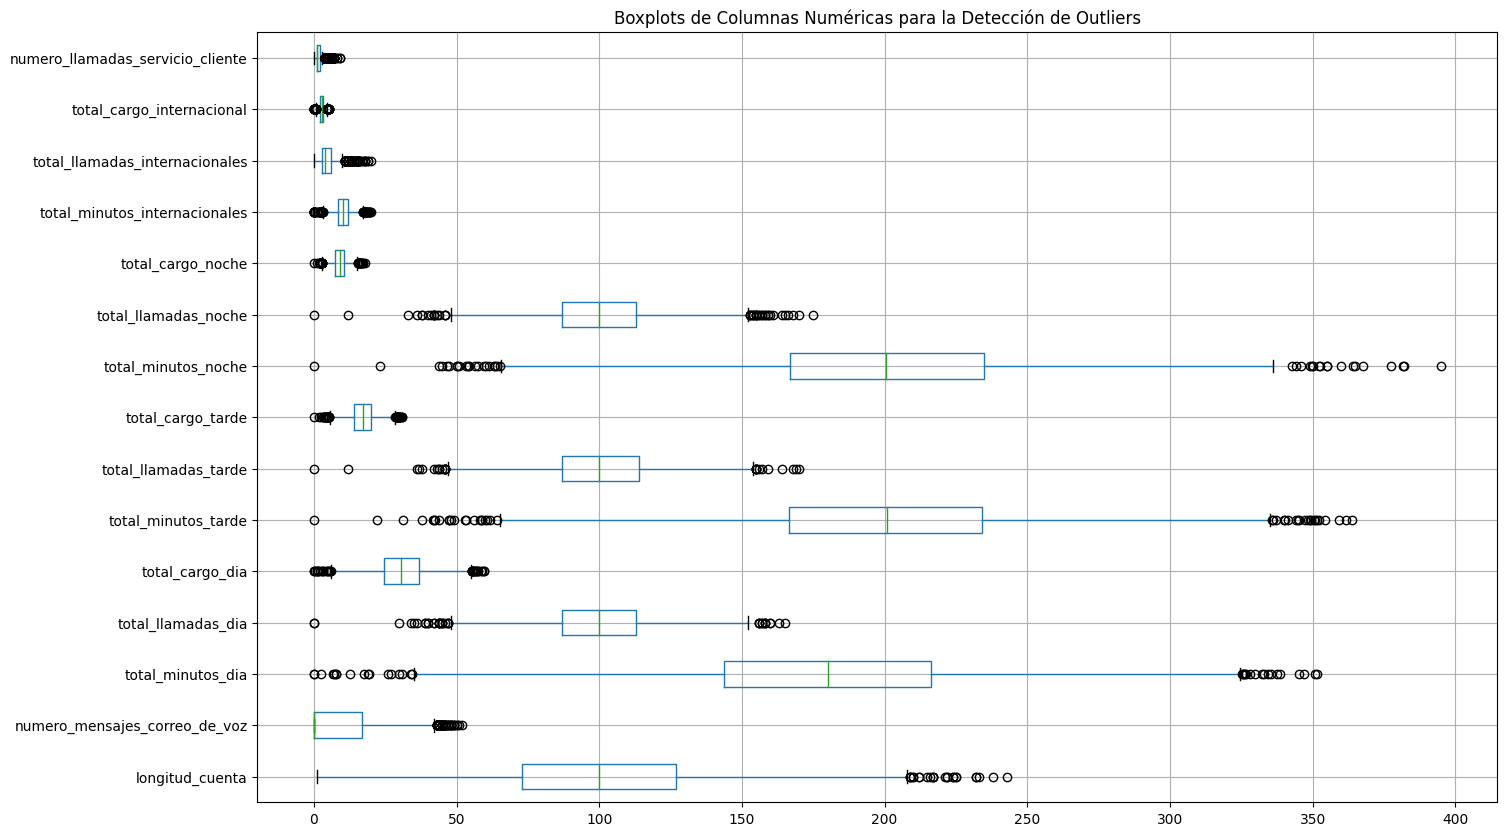

In [20]:
# Seleccionamos las columnas numéricas
columnas_numericas = ['longitud_cuenta', 'numero_mensajes_correo_de_voz', 'total_minutos_dia', 'total_llamadas_dia', 'total_cargo_dia',
                      'total_minutos_tarde', 'total_llamadas_tarde', 'total_cargo_tarde', 'total_minutos_noche', 'total_llamadas_noche',
                      'total_cargo_noche', 'total_minutos_internacionales', 'total_llamadas_internacionales', 'total_cargo_internacional',
                      'numero_llamadas_servicio_cliente']

# Verificamos que existan estas columnas
columnas_presentes = [col for col in columnas_numericas if col in pf.columns]

# Y los mostramos con un gráfico
if columnas_presentes:
    plt.figure(figsize=(16, 10))
    pf[columnas_presentes].boxplot(vert=False)
    plt.title('Boxplots de Columnas Numéricas para la Detección de Outliers')
    plt.show()
else:
    print("Las columnas especificadas no están presentes en el DataFrame.")

### 7. Cree funciones para realizar la imputación de variables sobre las observaciones encontradas en los puntos 5 y 6.

##### 7.1. Primero, la función para la imputación de valores nulos:

In [21]:
def imputar_nulos(pf):
    # Selecionamos y guardamos en variable los datos nulos que se encontraron
    valores_nulos = pf.isnull().sum()

    plt.figure(figsize=(10, 6))
    sns.heatmap(pf.isnull(), cbar=False, cmap='viridis')
    plt.title('Mapa de Calor de Valores Nulos en el Conjunto de Datos')
    plt.show()

    # Realizamos la imputación
    pf_imputado = pf.fillna(pf.mean())

    return pf_imputado



##### 7.2. Segundo, la función para la imputación de valores atípicos

In [22]:
def imputar_atipicos(pf, columnas_numericas):
    # Calculamos el rango intercuartílico (IQR) para cada columna
    Q1 = pf[columnas_numericas].quantile(0.25)
    Q3 = pf[columnas_numericas].quantile(0.75)
    IQR = Q3 - Q1

    # Identificamos los valores atípicos utilizando el método del rango intercuartílico (IQR)
    atipicos = ((pf[columnas_numericas] < (Q1 - 1.5 * IQR)) | (pf[columnas_numericas] > (Q3 + 1.5 * IQR)))

    # Imputamos los valores atípicos
    pf_imputado = pf.copy()
    pf_imputado[columnas_numericas] = np.where(atipicos, pf[columnas_numericas].median(), pf[columnas_numericas])

    return pf_imputado



### 8. Determine cual es la variable dependiente en el conjunto de datos.

##### 8.1. Se determinó que la variable dependiente es 'abandono'


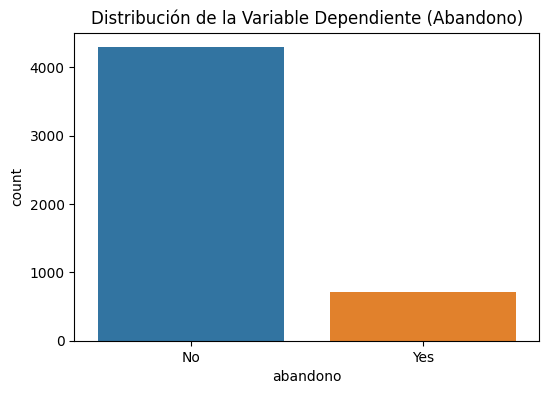

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(x='abandono', data=pf)
plt.title('Distribución de la Variable Dependiente (Abandono)')
plt.show()

##### 8.2. Se determinó que la variable dependiente es 'Internacional'


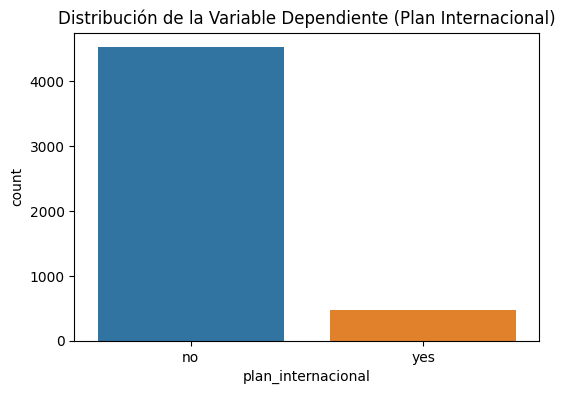

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(x='plan_internacional', data=pf)
plt.title('Distribución de la Variable Dependiente (Plan Internacional)')
plt.show()

##### 8.3. Se determinó que la variable dependiente es 'Plan Correo de Voz'


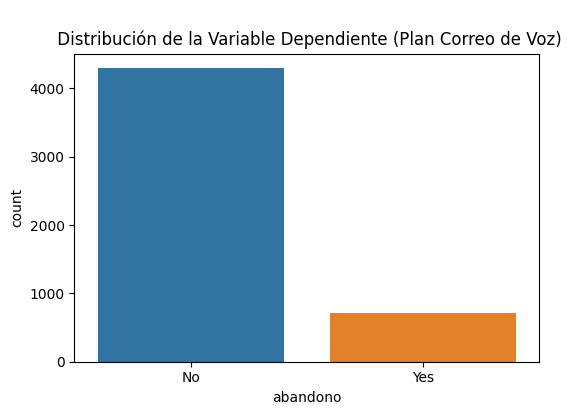

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(x='abandono', data=pf)
plt.title('\n Distribución de la Variable Dependiente (Plan Correo de Voz)')
plt.show()

### 9. Realice las conversiones de tipos de datos de las variables según correspondan

In [ ]:
# Con la selecicción de las columnas numericas que realizamos anteriormente. Realizamos la converción
pf[columnas_numericas] = pf[columnas_numericas].apply(pd.to_numeric, errors='coerce')

# Mostramos los cambios.
print(pf.dtypes)

### 10. Realice las conversiones de las variables categóricas a numéricas según correspondan

In [ ]:
# Hora seleccionamos los campos que no son numericos y los convertimos de variables categóricas a numéricas
pf['abandono'] = pf['abandono'].map({'No': 0, 'yes': 1})  # Convertir 'No' a 0 y 'yes' a 1
pf['plan_internacional'] = pf['plan_internacional'].map({'no': 0, 'yes': 1})  # Convertir 'No' a 0 y 'yes' a 1
pf['plan_correo_de_voz'] = pf['plan_correo_de_voz'].map({'no': 0, 'yes': 1})  # Convertir 'No' a 0 y 'yes' a 1

# Mostramos los cambios.
print(pf.dtypes)

### 11. Realice el proceso de estandarización o normalización en el conjunto de datos

##### 11.1. Primero, la estandarización

In [ ]:
# Estandarizamos las columnas numéricas usando scaler
scaler = StandardScaler()
pf[columnas_numericas] = scaler.fit_transform(pf[columnas_numericas])

# Mostramos la estandarización
print(pf.head())


##### 11.2. Segundo, la normalización

In [ ]:
# Normalización las columnas numéricas usando scaler
scaler = MinMaxScaler()
pf[columnas_numericas] = scaler.fit_transform(pf[columnas_numericas])

# Mostramos la normalización
print(pf.head())


### 12. Determine la correlación de las variables sustente sus hallazgos con evidencia grafica.

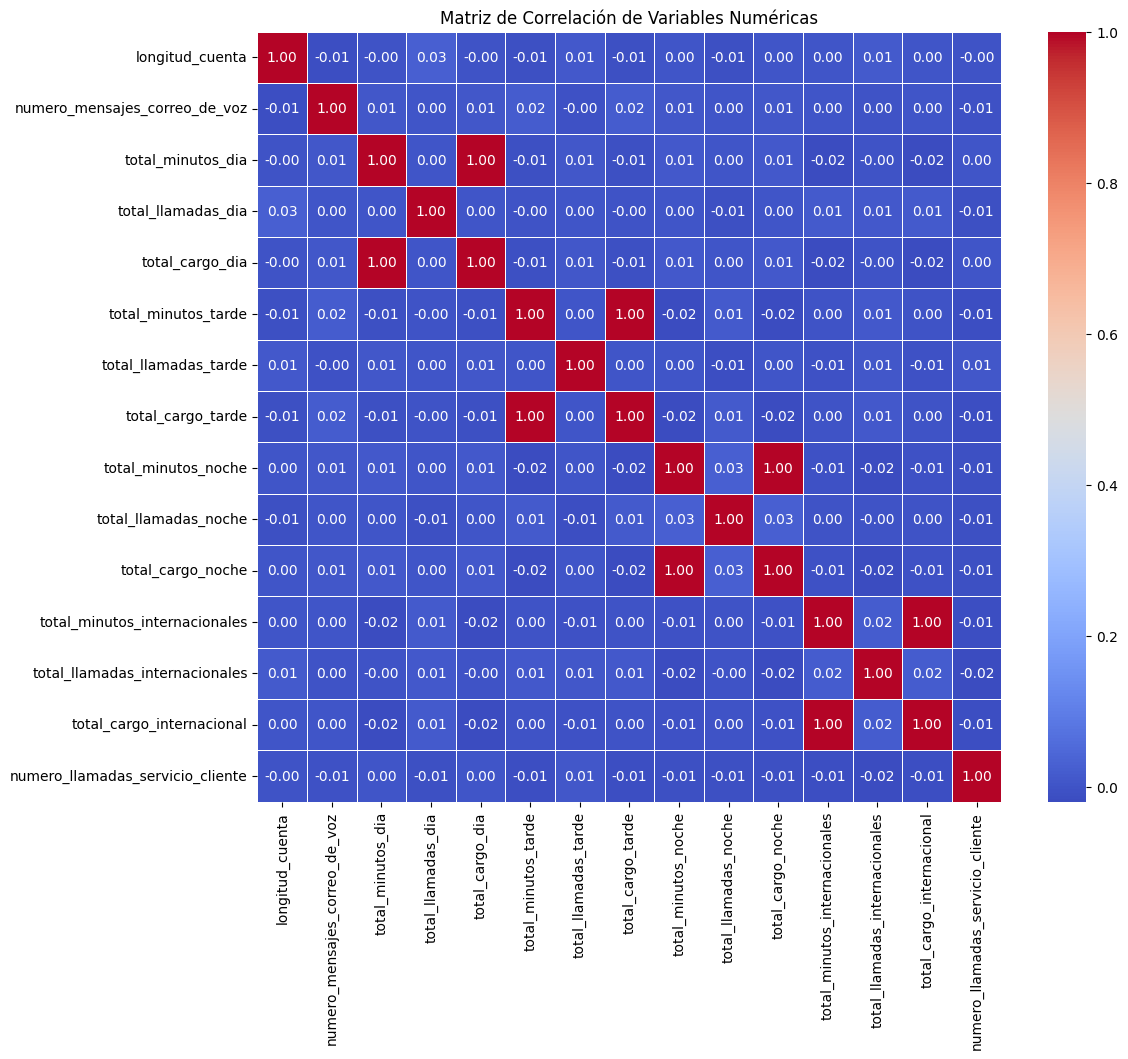

In [30]:
# Cramos la matriz de correlacion
matriz_correlacion = pf[columnas_numericas].corr()

# Con la matriz de correlación cremaos un mapa de calor el cual nos muestra a correlación de las variables
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

### 13. Realice un proceso de ACP en el conjunto de datos y determine cuantos CP son los ideales para confirmar el nuevo conjunto de datos. Sustente sus hallazgos de forma grafica y con datos estadísticos.

##### 13.1. Aplicar estandarización a las columnas numéricas


In [31]:
pf_std = (pf[columnas_numericas] - pf[columnas_numericas].mean()) / pf[columnas_numericas].std()

##### 13.2. Realizar el Análisis de Componentes Principales (ACP)

In [32]:
pca = PCA()
componentes_principales = pca.fit_transform(pf_std)

##### 13.3. Obtener la proporción de varianza explicada por cada componente principal

In [33]:
varianza_explicada = pca.explained_variance_ratio_

##### 13.4. Visualizar la proporción de varianza explicada acumulativa

In [34]:
varianza_acumulativa = varianza_explicada.cumsum()
num_componentes = range(1, len(varianza_acumulativa) + 1)

##### 13.5. Mostramos el gráfico.

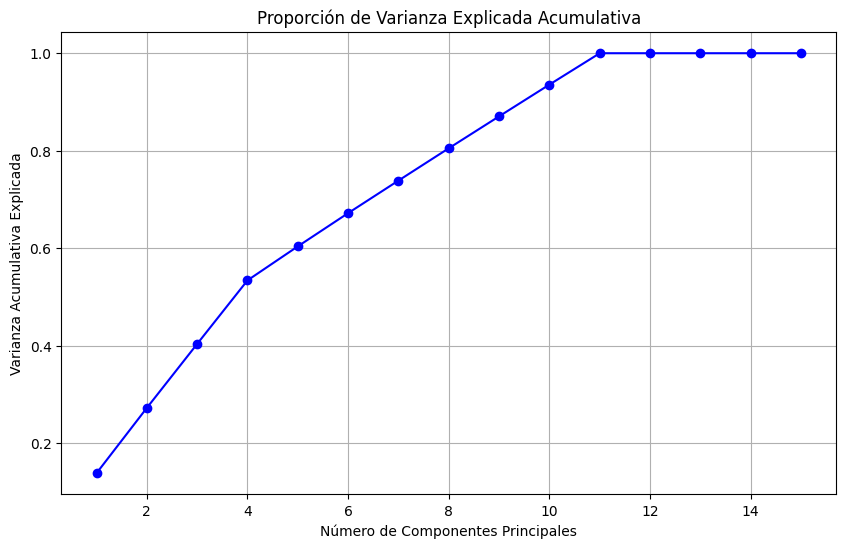

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(num_componentes, varianza_acumulativa, marker='o', linestyle='-', color='b')
plt.title('Proporción de Varianza Explicada Acumulativa')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulativa Explicada')
plt.grid(True)
plt.show()

### 14. Aplique los comandos necesarios para guardar el dataset resultante de ACP en un archivo con nombre churn_process.csv

##### 14.1. Obtener el conjunto de datos resultante después de ACP

In [37]:
columnas_acp = [f'Componente_Principal_{i+1}' for i in range(componentes_principales.shape[1])]
df_acp = pd.DataFrame(data=componentes_principales, columns=columnas_acp)

##### 14.2. Concatenar el conjunto de datos ACP con las columnas no numéricas originales

In [38]:
pf_acp = pd.concat([pf.drop(columns=columnas_numericas), df_acp], axis=1)

##### 14.1. Guardar el conjunto de datos resultante en un nuevo archivo CSV

In [39]:
pf_acp.to_csv('churn_process.csv', index=False)

###### Para encontrar el archivo ejecutamos.

In [ ]:
print(os.getcwd())